In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
%matplotlib inline

In [ ]:
from sklearn.datasets import load_iris

# Call the load_iris function to get the dataset
iris_data = load_iris()

# Create a DataFrame from the data
df = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)

In [ ]:
# Display the dimensions of the DataFrame
df.shape

(150, 4)

In [ ]:
# Display the first few rows of the DataFrame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# View summary of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
# Add the target variable to the DataFrame
df['species'] = iris_data.target

# Map the target values to their corresponding names
df['species'] = df['species'].map({0: iris_data.target_names[0], 1: iris_data.target_names[1], 2: iris_data.target_names[2]})

# Display frequency counts of the 'species' column
display(df['species'].value_counts())

,count
species,
setosa,50
versicolor,50
virginica,50


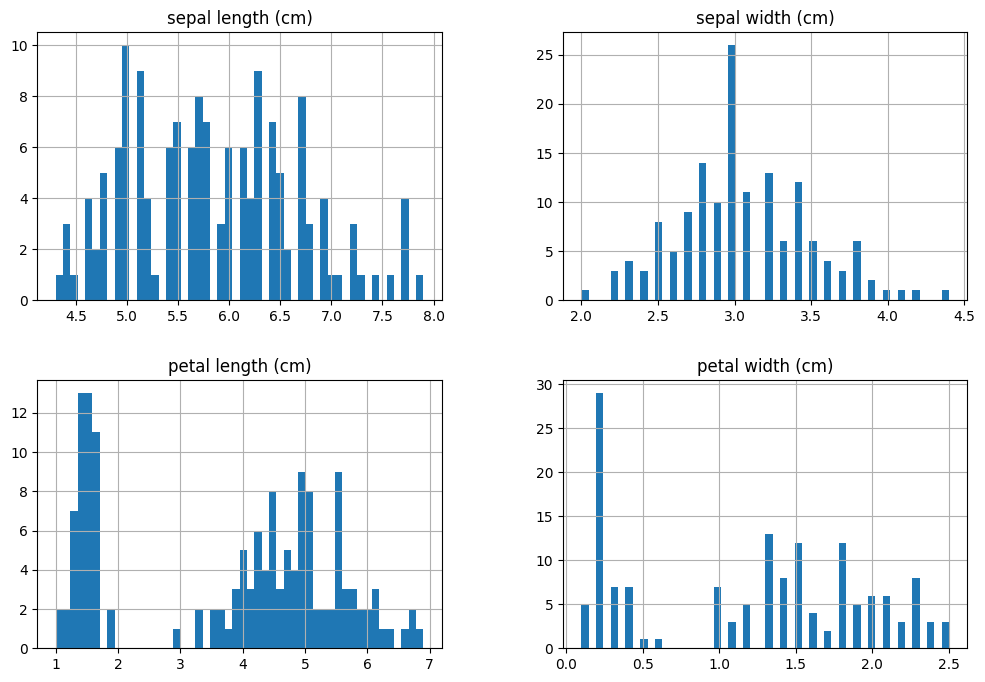

In [ ]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(12, 8))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('species', axis=1)
y = df['species']

# Split data into training and the rest (validation + test)
X_train, X_rem, y_train, y_rem = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Split the rest into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=42, stratify=y_rem)

# Display the shapes of the resulting sets
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Validation set shape (X_val, y_val):", X_val.shape, y_val.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

Training set shape (X_train, y_train): (105, 4) (105,)
Validation set shape (X_val, y_val): (22, 4) (22,)
Testing set shape (X_test, y_test): (23, 4) (23,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create a Decision Tree Classifier object with entropy criterion and max_depth
dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Fit the model to the training data
dt_classifier.fit(X_train, y_train)

print("Decision Tree Classifier fitted successfully with entropy criterion and max_depth=3.")

Decision Tree Classifier fitted successfully with entropy criterion and max_depth=3.


In [ ]:
# Define a range of values for max_depth to explore
max_depth_values = range(1, 11)

# Display the defined range of values
print("Max depth values to explore:", list(max_depth_values))

Max depth values to explore: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [ ]:
from sklearn.metrics import accuracy_score

# Create an empty list to store the accuracy scores
accuracy_scores = []

# Loop through the max_depth values
for max_depth in max_depth_values:
    # Instantiate a DecisionTreeClassifier
    dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth, random_state=42)

    # Fit the model to the training data
    dt_classifier.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = dt_classifier.predict(X_val)

    # Calculate the accuracy score
    accuracy = accuracy_score(y_val, y_pred)

    # Append the accuracy score to the list
    accuracy_scores.append(accuracy)

# Display the list of accuracy scores
print("Accuracy scores for each max_depth:", accuracy_scores)

Accuracy scores for each max_depth: [0.6818181818181818, 0.9090909090909091, 0.9545454545454546, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091, 0.9090909090909091]


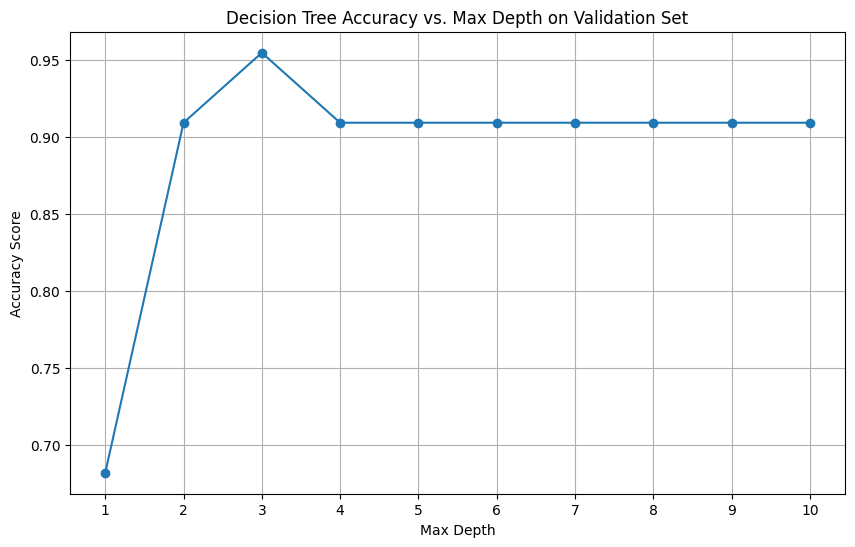

In [ ]:
# Create a figure and an axes object for the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the max_depth_values on the x-axis and the accuracy_scores on the y-axis
ax.plot(max_depth_values, accuracy_scores, marker='o')

# Label the x-axis and y-axis
ax.set_xlabel("Max Depth")
ax.set_ylabel("Accuracy Score")

# Add a title to the plot
ax.set_title("Decision Tree Accuracy vs. Max Depth on Validation Set")

# Set the x-axis ticks
ax.set_xticks(max_depth_values)

# Add a grid to the plot
ax.grid(True)

# Display the plot
plt.show()

In [ ]:
# Combine the training and validation sets
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

# Display the shapes of the combined set
print("Combined training and validation set shape (X_train_val, y_train_val):", X_train_val.shape, y_train_val.shape)

Combined training and validation set shape (X_train_val, y_train_val): (127, 4) (127,)


In [ ]:
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier with the optimal max_depth
final_dt_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

# Fit the model to the combined training and validation data
final_dt_classifier.fit(X_train_val, y_train_val)

# Predict on the test set
y_test_pred_final = final_dt_classifier.predict(X_test)

# Generate and display the classification report
print("Classification Report on Test Set (Model trained on Train + Validation data):")
print(classification_report(y_test, y_test_pred_final))

Classification Report on Test Set (Model trained on Train + Validation data):
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         7
  versicolor       0.89      1.00      0.94         8
   virginica       1.00      0.88      0.93         8

    accuracy                           0.96        23
   macro avg       0.96      0.96      0.96        23
weighted avg       0.96      0.96      0.96        23



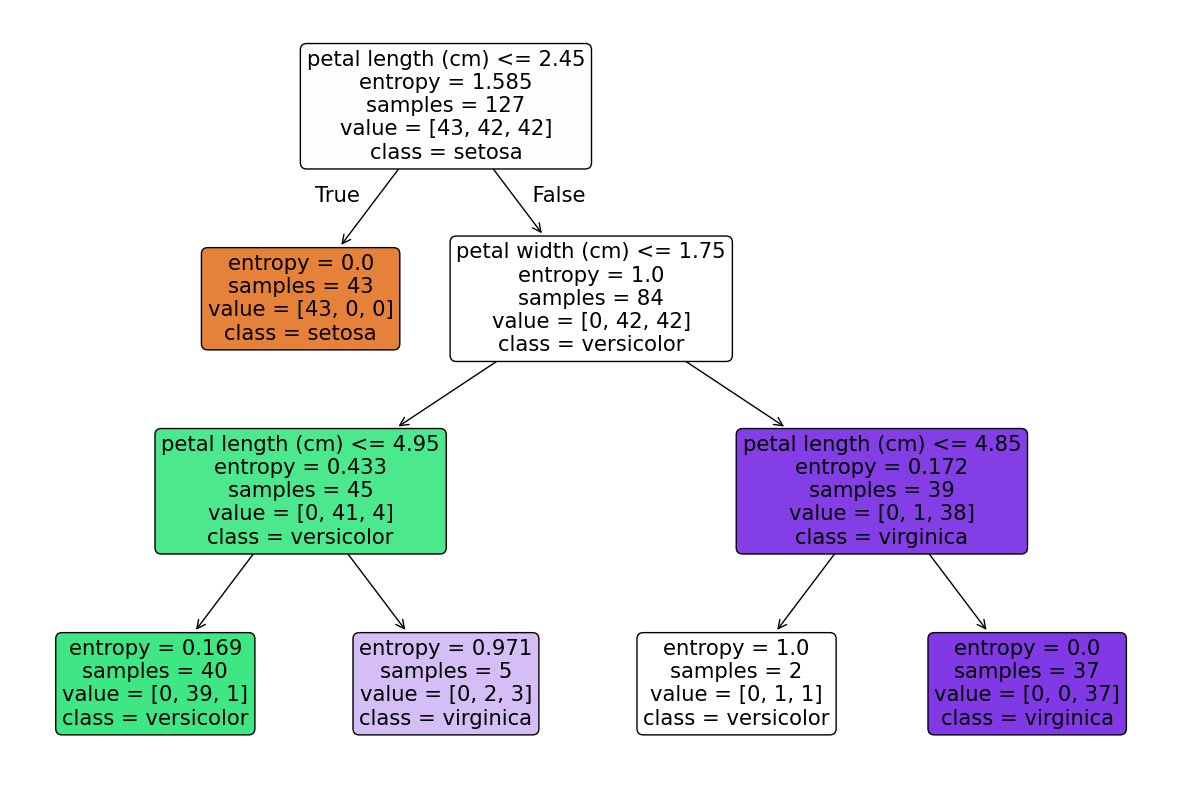

In [ ]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(final_dt_classifier, feature_names=X_train_val.columns, class_names=final_dt_classifier.classes_, filled=True, rounded=True)
plt.show()